# STA 141B: Midterm (or Super-Homework if you prefer)

### Worth 300 Points

Fall 2018

## Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name:Ruochen

Last Name: Zhong

Student ID: 912888970

## Instructions

Please print your answer notebook to pdf (make sure that it is not unnecessarily long due to long output) and submit as the homework solution with your zip file.

For readability you,

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement
- you may add multiple cells between exercise cells

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

## Trans-Atlantic Slave Trade

In this homework, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

Throughout this homework you will need to follow the principles of graphical excellence and the grammar of graphics.  **Use only Plotnine for your graphics**, do not use Pyplot, Seaborn, or Plotly since they do not follow closely the grammar of graphics.  Be sure to include titles and necessary contextual captions.

**Warning:** The Trans-Atlantic Slave Trade remains one of the most horrific abuses of human rights in history.  This homework deals with the numbers behind this forced migration, please be aware that this is a sensitive topic for possibly yourself and others.   A suitable amount of respect and seriousness is required when dealing with this data.

**Exercise 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. There is lots of missingness in this data, and some of these variables are imputed.  We will be imputing some of these variables ourselves, so delete any variable that ends with 'imp'.
3. Open up the pdf file: TAST_codebook.pdf which is the data dictionary for this and other related datasets.  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset.
4. Create a list where you describe the meaning of the columns of your imported dataframe.  You can group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [1]:
# 1.1 
import numpy as np
import pandas as pd
import os
import plotnine as p9
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as sm
# read and encoding data, replace whitespace with NA
data = pd.read_csv('tastdb-2010.csv',encoding='Latin-1').replace(' ',np.nan)
print('In total {} columns'.format(len(data.columns)))
data.head()

In total 98 columns


,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1,Pastora de Lima,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Tibério,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,Paquete Real,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,Bom Caminho,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,Benigretta,NaN,6,NaN,NaN,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#1.2
# for every column in the data, exclude those who end with 'imp' or length less than 1
for column in data.columns:
    if column.endswith('imp') or len(column)<=1:
         data.drop(column,inplace=True,axis=1)
print('In total {} columns'.format(len(data.columns)))
data.head()

In total 89 columns


,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1,Pastora de Lima,4,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Tibério,NaN,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,Paquete Real,NaN,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,Bom Caminho,NaN,NaN,NaN,NaN,NaN,40,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,Benigretta,NaN,NaN,NaN,NaN,NaN,25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.4

* voyageid: Voyage identification number  
* evgreen: Voyage i n 1999 CD-ROM  
* shipname: Name of vessel  
* national: Country in which ship registered  
* placcons: Place where vessel constructed    
* yrcons: Year of vessel’s construction  
* placreg: Place where vessel registered  
* yrreg: Year of vessel’s registration  
* rig: Rig of vessel  
* tonnage:  Tonnage of vessel  
* tonmod: Tonnage standardized on British measured tons  
* guns: Guns mounted  
* onwera ... onwerp: Owners of the slave ships  
* fate ... fate4: Particular outcome of voyage  
* resistance: African resistance  
* plac1tra ... plac3tra: First/Second/Thrid place of slave purchase  
* npafttra: Port of call before Atlantic crossi ng  
* sla1port: First place of slave landing  
* adpsale1, adpsale2: First/Second place of slave landing  
* portret: Place at which voyage ended  
* yearam: Year of arrival at port of disembarkation (imputed)  
* Date_dep: Date that voyage began
* Date_buy:Date that slave purchase began  
* Date_leftAfr: Date that vessel left last slaving port  
* Date_land1: Date that slaves landed at first place  
* Date_depam: Date ship left on return voyage  
* Date_end: Date ship left on return voyage  
* captaina ... captainc: First/Second/Third captai n’s name  
* crew1, crew3: Crew at voyage outset, Crew at first landing of slaves  
* crewdied: Crew died during compl ete voyage  
* slintend: Slaves intended from first port of purchase  
* ncar13, ncar15, ncar17: Slaves carried from first/second/third port of purchase  
* tslavesd: Total slaves on board at departure from last slaving port  
* slaarriv: Total slaves arrived at first port of disembarkation  
* slas32,36,39: Slaves disembarked at first/second/third place
* menrat7: Percentage of men at departure or arrival  
* womrat7: Percentage of women at departure or arrival  
* boyrat7: Percentage of boys at departure or arrival  
* girlrat7: Percentage of girls at departure or arrival  
* malrat7: Male rati o at departure or arrival  
* chilrat7: Chil d rati o at departure or arrival    
* jamcaspr: Av erage price of slaves standardized on sterling cash price of prime slaves sold in Jamaica  
* vymrtrat: Slave mortality rate (slave deaths / slaves embarked)  
* sourcea .. sourcer: First/.../Eighteenth source of information

**Exercise 2.** First pass at estimating the total number of captives.

1. We will ultimately try to estimate the number of people captured into slavery and forced through the middle passage.  What variable would you use to estimate the total number of captives taken from Africa?  Let me call this variable Var A in this problem statement.   How much of the data for Var A is missing?
2. Create an initial estimate of the total number of captives taken from Africa by assuming that Var A is Missing Completely at Random.  
3. What other variables do you expect to be associated with Var A and why?  Give at least three possibilities.  Which will probably be the most strongly associated with this variable?  (I will be looking for a specific variable to be listed so be sure to think about the most strongly associated one.)

In [3]:
#2.1
# change some columns in data to be numeric
data = data.apply(pd.to_numeric, errors = 'ignore')
VarA_miss = data['tslavesd'].isnull().sum()
VarA_miss

26734

### 2.1
I use the variable tslavesd as the total number of captives taken from Africa, VarA misses 26734 number of data.

In [4]:
#2.2
# summary the data
data['tslavesd'].describe()
#predict NA values by the median of those known values and add their total to the known total
predict_total =  round((data['tslavesd'].describe()[5])*\
(data['tslavesd'].isnull().sum()) +\
data['tslavesd'].sum())
predict_total

11298998.0

### 2.2
the total nubmer of captives is 11298998.

### 2.3
I expect these values to be associate with VarA:
* the tonmod, becuase the tonmod will directly decide how many slaves a ship can afford.
* the slaariv, because the the number of slaves arrived are directly related to the number of slaves being caught.
* the slintend, because the slaves the ship intended to buy will decide the number of captives strongly.

In [5]:
#2.3
# create a correlation matrix for the data columns
corr = data.corr()
# extract the value of the tslavesd's correlation with other columns
tslavesd_corr = corr.loc['tslavesd',]
# change the value to abosulte value
tslavesd_corr = abs(tslavesd_corr)
# sort the correlation and print the top 10
tslavesd_corr = tslavesd_corr.sort_values(ascending = False)
tslavesd_corr.head(10)

tslavesd    1.000000
slaarriv    0.937504
slintend    0.831760
ncar13      0.810653
slas32      0.783066
ncar17      0.702715
slas39      0.629987
slas36      0.623793
tonmod      0.613831
jamcaspr    0.580150
Name: tslavesd, dtype: float64

### 2.3
from the the top correlations, it shows that the total slaves arrived at first port of disembarkation has the most strong relationship with the total number of captives.

**Exercise 3.** The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  Subselect the values of `national` that have more than 100 voyages with that value.  
2. Create a DataFrame that filters out the voyages where `national` does not have one of these values.  You should be retaining voyages with only these most common values.
3. Create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. Using Plotnine, plot the counts of the voyages by flag as a function of voyage year.  Think about how best to display the count of a voyage by year and then how should you be including the flag variable.
5. In this plot, what are the geometric elements and aesthetic mappings?  What other components of the grammar of graphics are you using?
6. Do you observe any abrupt changes in the patterns of these counts for a given flag?  Investigate the cause for this change (using Google, etc.).

In [6]:
#3.1
# check which values of national have more than 100 voyages
national_values = (data.national.value_counts() > 100)
# create a list to show those values of national
values = list(national_values[national_values == True].index)
values

[7.0, 4.0, 10.0, 9.0, 1.0, 8.0, 5.0, 11.0]

In [7]:
#3.2
# subset the orginal data by checking whether their value of national is in the list
national_filter = data[data['national'].isin(values)]
national_filter.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#3.3
# create a new variable flag equals to the national
national_filter['flag'] = national_filter['national']
# match the values to their national name 
national_filter = national_filter.replace({'flag': {1:'Spain',4:'Portugal',
                                          5: 'Brazil',7:'Great Britain',8:'Netherlands',
                                          9:'U.S.A.',10:'France',11:'Denmark'}})
national_filter.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,flag
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
15,16,1.0,Sociedade,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
94,95,1.0,Patrocínio,4.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
113,114,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
114,115,1.0,NaN,10.0,NaN,NaN,NaN,NaN,4.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France


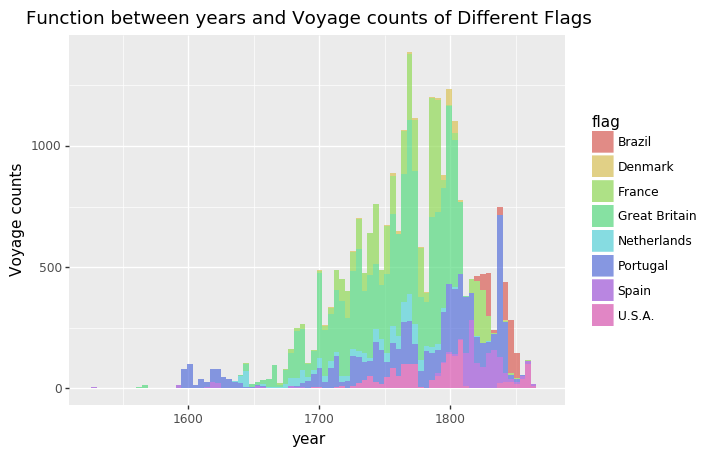

<ggplot: (7546944958)>

In [9]:
#3.4
# draw the graph 
(ggplot(national_filter, aes(x='yearam', fill = 'flag')) 
+ geom_histogram(alpha = 0.7)
+ xlab("year") + ylab("Voyage counts") 
+ ggtitle("Function between years and Voyage counts of Different Flags"))


### 3.5

In my plot, my aesthetic mappings is the year and the counts of voyages, my geometric elements is the point and the smooth of those point. I also use facet_wrap to distinguish the catagorical variable "Flags", and use xlab, ylab, ggtitle to label the graph. 

### 3.6
Yes, I found that the Britian's counts of voyages increases abruptly during 1600 to 1800. From the website:http://abolition.e2bn.org/slavery_45.html, I found that the reason is "As British settlements in the Caribbean and North America grew, often through wars with European countries such as Holland, Spain and France, British slave traders increasingly supplied British colonies". What's more, the overall counts of voyages increases at first, but decreases after year 1800. After searching online, I found this trend is because many countries after year 1800 began to abolish the use of slaves.

**Exercise 4.** Looking at some of these ships.

1. Search for the slave ship mentioned in the following wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship) Hint: Look at all records of ships with 'Brook' in the name and try to match the characteristics to those described.  How many voyages for this ship are in the data (try to exclude ships with the same name)?
2. Create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.
3. The movie Amistad was based on a real slave ship and slave uprising.  Read about it here: https://en.wikipedia.org/wiki/La_Amistad  Try to find this ship by searching for it by name and also searching for ships in the same 10 year period as this event with a slave resistance.  If you think you found it describe it, otherwise describe the events of another voyage that you did find.  

In [10]:
#4.1
# extract shipnames with brook in the dataset
data_brook =  national_filter[national_filter['shipname']\
.str.contains("Brook") == True]
# extract rows who has 609 captives(information from the website)
true_brook = data_brook.loc[data_brook['tslavesd'] == 609]
# find the voyage belongs to that ship by tonmod
true_brook2 = data_brook[data_brook['tonmod'].isin(true_brook['tonmod'])]
brook_number = true_brook2.shape[0]
print('Total number of voyages for that ship is {}.'.format(round(brook_number)))

Total number of voyages for that ship is 4.


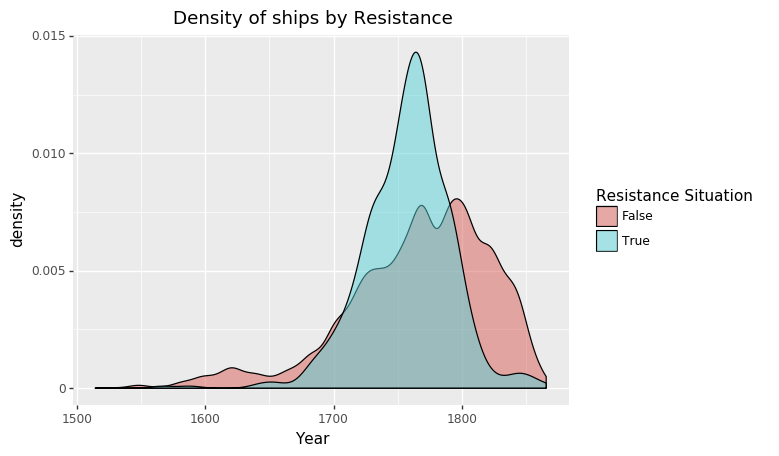

<ggplot: (7550773957)>

In [11]:
#4.2
# create the new variable 
data["Resistance Situation"] = data.eval("resistance > 0")
# draw the graph
display(p9.ggplot(data) + p9.aes('yearam',fill='Resistance Situation') \
+ p9.labels.xlab("Year")\
+ p9.geom_density(alpha=.5) + p9.labels.ggtitle('Density of ships by Resistance'))

### 4.2
This graph shows that during 1700 and 1800 there are an obvious increasing of the density fo Resistance,
This means the trade of slaves was at its peak at that time, so it causes a lot of resistance.

In [12]:
#4.3
#subset the data by the features of the "Amistad"
data_Amistad = data[((data['yearam'] >= 1830) & (data['yearam'] <= 1840)\
                     & (data['Resistance Situation'] == True))\
                     |(data['shipname'].str.contains("Amistad") == True)]
data_Amistad.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,Resistance Situation
769,774,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
935,940,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
959,964,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1178,1196,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1206,1224,1.0,Amistad Habanera,1.0,NaN,NaN,NaN,NaN,51.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


### 4.3
Considering the Resistance Situation and their Fate, I think the ship named "Jesus Maria" and the "Temerario" are very similar to the true ship becuase it has resistance and its fate is condemned Court of Mixed Commission, Havana or  Sierra Leone, which matches the area of the events happens in the article. However, I cannot find some very strongly evidence to prove that they are the true ship "Amistad".

**Exercise 5.** Other patterns.

1. The arrival and departure locations are quite detailed.  Look in the appendix of the codebook for the location codes.  Make a coarser version of both arrival and departure port variables (select just the last departure and first arrival) so that for example,  
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. Plot the trend of voyages as a function of arrival location.  What trends do you see?
3. Do the same for departure location.
4. Plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.  Also include in the plot another possible confounding variable.
5. Describe the geoms, aesthetic mappings, and other aspects of the plot.

In [13]:
#5.1
#Only extract the first digits of the number lists from Departure and Arrival code
data['Departure'] = data['npafttra'].astype(str).str[0].apply\
(pd.to_numeric,errors = 'coerce')
data['Arrival'] = data['sla1port'].astype(str).str[0].apply\
(pd.to_numeric,errors = 'coerce')
# replace those digits with their broad areas
data = data.replace({'Arrival': {1:'Europe',2:'Mainland North America',
                                     3:'Caribbean',4:'Spanish American Mainland',
                                     5:'Brazil',6:'Africa',8:'Other'}})
data = data.replace({'Departure': {1:'Europe',2:'Mainland North America',
                                     3:'Caribbean',4:'Spanish American Mainland',
                                     5:'Brazil',6:'Africa',8:'Other'}})
data.head()

,voyageid,evgreen,shipname,national,placcons,yrcons,placreg,yrreg,rig,tonnage,...,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,Resistance Situation,Departure,Arrival
0,1,1.0,Pastora de Lima,4.0,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Brazil
1,2,1.0,Tibério,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Brazil
2,3,1.0,Paquete Real,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Brazil
3,4,1.0,Bom Caminho,NaN,NaN,NaN,NaN,NaN,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Brazil
4,5,1.0,Benigretta,NaN,NaN,NaN,NaN,NaN,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Brazil


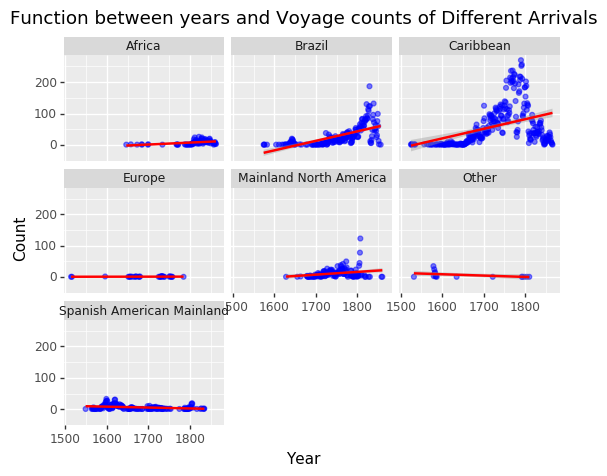

<ggplot: (-9223372029304621529)>

In [14]:
#5.2
#subset the original dataset
df_arrive = data.loc[:,['yearam','Arrival']]
# count each ones Arrivlas and year to form a dataframe 
df_arrive1 = df_arrive.groupby(["Arrival","yearam"]).size().reset_index(name='count')

display((ggplot(df_arrive1, aes(x='yearam', y='count')) 
+ geom_point(alpha = 0.5,color = 'blue')
+ stat_smooth(method ='lm',color = 'red')
+ facet_wrap('Arrival') + xlab("Year") + ylab("Count") 
+ ggtitle("Function between years and Voyage counts of Different Arrivals")))


### 5.2
From the above plot, I found that the number of voyages to the Caribbean and Brazil increase abruptly from 1500 to 1800, but for other Arrivals the number of voyages along time tends to be flat.

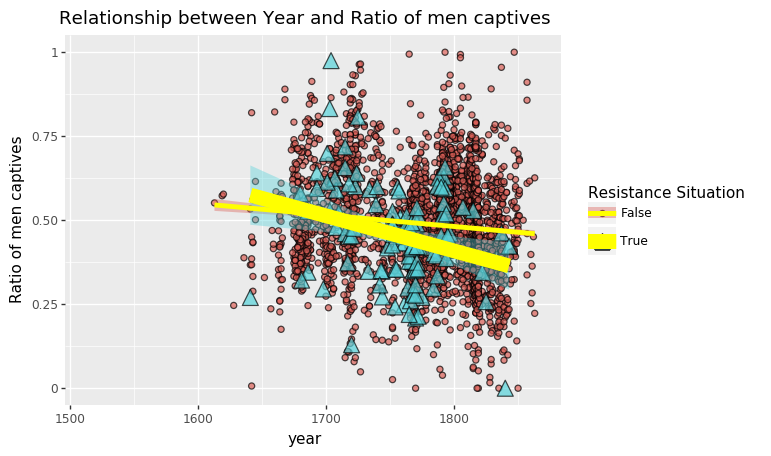

<ggplot: (7552267640)>

In [15]:
#5.4
(ggplot(data, aes(x='yearam', y='menrat7', fill = 'Resistance Situation', 
                  size = 'Resistance Situation', shape = 'Resistance Situation')) 
+ geom_point(alpha = 0.7)
+ stat_smooth(method ="lm",color = 'yellow')
+ xlab("year") + ylab("Ratio of men captives") 
+ ggtitle("Relationship between Year and Ratio of men captives"))


### 5.4
From the above graph, I use the Resistance as the confounding variable, from the trend, it shows that as the year increases, both trend will decreases. However, the difference is that for resistance "True", the ratio of men decreases more abruptly. This may because most people take part in the resistance are men, if they sacrificed during resistance, the men ratio will decrease more abruptly. 

### 5.5
In this plot, my aesthetic mappings is the year and the ratio of men captives, my geometric elements is the point and the smooth of those point. I also use fill and shape in aesthetics to distinguish the catagorical variable "Resistance Situation", and use xlab, ylab, ggtitle to label the graph. 

**Exercise 6.** Estimating total captives count I.

1. Plot the number of slaves at departure from last slaving and the number that arrived at the first port of disembarkation.  
2. Why do these variables concentrate near a line?  Most of the data lies on one side of the line, but a small fraction do not, what could have happened for those that did not?  Separate the data into these two populations.
3. For those voyages where the number of captives decreased (through death), calculate a death rate (ratio of captives that died).  
4. Plot this death rate as a function of year.  Make any appropriate scale transformations, and include a trend line or other smoother.  What is your interpretation?
5. Guess at two possible predictors and create visualizations that give you a sense of their association with the death rate.  Make sure that one of these is categorical, and plot it with the death rate and year so that there are three variables used in the same plot.
6. For these plots, list the geoms, aesthetic mappings, scales, and other notable aspects used.

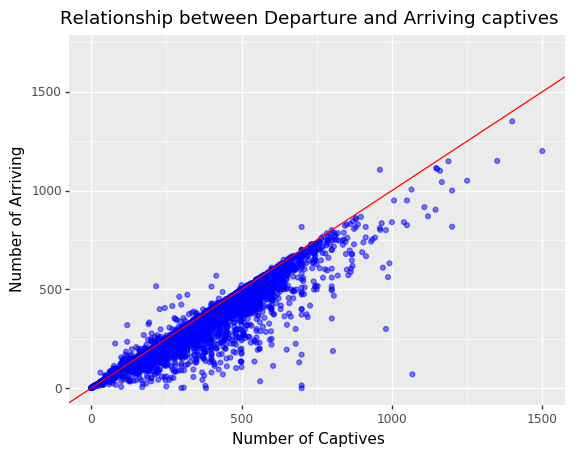

<ggplot: (-9223372029302684570)>

In [16]:
#6.1
(ggplot(data, aes(x='tslavesd', y='slaarriv')) 
+ geom_point(alpha = 0.5,color = 'blue')
+ geom_abline(slope = 1, color = 'red')
+ xlab("Number of Captives") + ylab("Number of Arriving") 
+ ggtitle("Relationship between Departure and Arriving captives"))


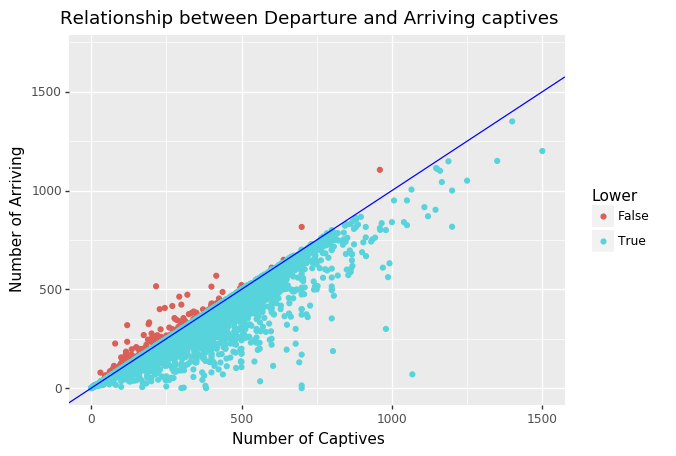

<ggplot: (7548185527)>

In [17]:
#6.2
# subset the data
data_divide = data.loc[:,['tslavesd','slaarriv']]
# create a variable to distinguish points above/below the line
data_divide['Lower'] = np.where((data_divide['tslavesd']\
/data_divide['slaarriv'])>= 1, True, False)

(ggplot(data_divide, aes(x='tslavesd', y='slaarriv',color='Lower')) 
+ geom_point()
+ geom_abline(color = 'blue')
+ xlab("Number of Captives") + ylab("Number of Arriving") 
+ ggtitle("Relationship between Departure and Arriving captives"))


### 6.2
they concentrate near the line becuase the line is based on people depature = people arriving. Usually, the ratio will near the 1, so most of points will near this line. For those who did not lay on that side, they are stranger becuase their populations even increased. The reason may be that there are some new born child, or there are some extra captives during the voyages which fails to be recorded.

In [18]:
#6.3
# calculate the death ratio
data['death_ratio'] = ((data['tslavesd'] - data['slaarriv']) / data['tslavesd'])\
.where(data['slaarriv'] < data['tslavesd'])


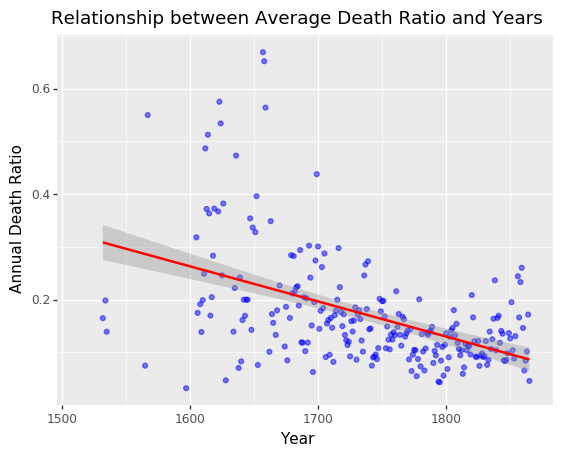

<ggplot: (-9223372029302685801)>

In [19]:
#6.4
# group death ratio by their annual averages
year_avg = data.groupby('yearam',as_index=False)['death_ratio'].mean()

display((ggplot(year_avg, aes(x='yearam', y='death_ratio')) 
+ geom_point(alpha = 0.5,color = 'blue')
+ stat_smooth(method ='lm',color = 'red')
+ xlab("Year") + ylab("Annual Death Ratio") 
+ ggtitle("Relationship between Average Death Ratio and Years")))

### 6.4
This graph shows that the death ratio is a roughly decreasing from 1500 to 1800, which means the trade of slaves become more sophisticated and the number o death was controled better as the time goes.

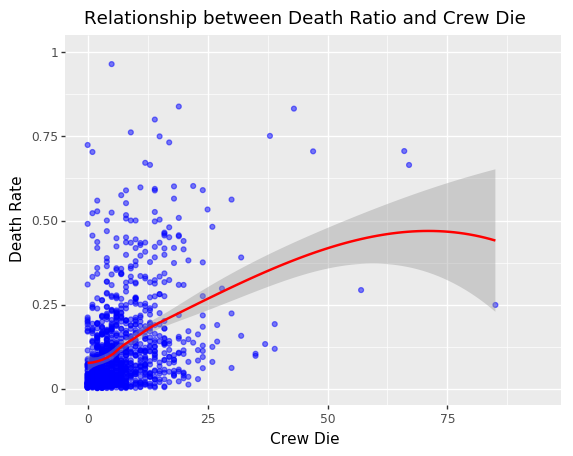

<ggplot: (7552090856)>

In [20]:
#6.5 first
# I guess the first one is the number of crew die
(ggplot(data, aes(x='crewdied', y='death_ratio')) 
+ geom_point(alpha = 0.5,color = 'blue')
+ stat_smooth(method ='loess',color = 'red')
+ xlab("Crew Die") + ylab("Death Rate") 
+ ggtitle("Relationship between Death Ratio and Crew Die"))


### 6.5, 1
I think the first one is the number of crew died, because the crew died means there is some conflicts between crew and slaves, so the death ratio will increase.

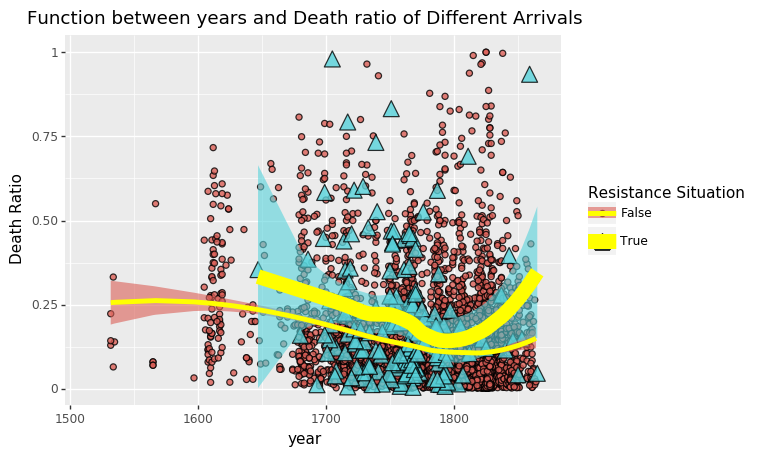

<ggplot: (7552091172)>

In [21]:
#6.5 Second
(ggplot(data, aes(x='yearam', y='death_ratio',fill = 'Resistance Situation',
                  size = 'Resistance Situation', shape = 'Resistance Situation')) 
+ geom_point(alpha = 0.8)
+ stat_smooth(method ='loess',color = 'yellow',alpha = 0.6)
+ xlab("year") + ylab("Death Ratio") 
+ ggtitle("Function between years and Death ratio of Different Arrivals"))

### 6.5, 2
I think the second one is the Resistance Situation, because Resistance will cause more death for both crew and the slaves, from the graph we can also see that the trend of the Resistance have a higher death ratio almost in all year peroid. 

## 6.6
graph 1: In this plot, my aesthetic mappings is the number of crew died and the death ratio, my geometric elements is the point and the smooth of those point. I also use xlab, ylab, ggtitle to label the graph. 

graph 2: In this plot, my aesthetic mappings is the year and the death ratio, my geometric elements is the point and the smooth of those point. I also use fill, size, and shape in aesthetics to distinguish the catagorical variable "Resistance Situation", and use xlab, ylab, ggtitle to label the graph. 

**Exercise 7.** Estimating total captives count II.

1. Using the variables selected, fit a prediction of death rate using linear regression and some simple transformations/scales.  You do not need to spend time doing automated model selection, just include the most likely predictor or predictors from the previous question.
2. We will impute the number of captives on board at departure, so enumerate the cases for missingness of the variables involved in the prediction.
3. We would like to predict the number of captives on departure from the number that arrived with the following formula,
$$
\textrm{arrived} = \pi (1 - \textrm{death rate}) \cdot (\textrm{captives taken}) + (1- \pi) (\textrm{average increase})
$$
where $\pi$ is the proportion of voyages with no increase in captives, and the average increase is over those that did see an increase. 
For those voyages with captives taken missing and arrived not missing, use the estimated death rate to predict the captives taken.
4. Impute the remainder by predicting the captives taken with the year variable, you can use simple linear regression.
5. With the same formula and method impute the number of captives upon arrival whenever it is missing.
6. Give a new estimate of the predicted total number of captives taken on the middle passage, the total number of deaths, and the overall death rate.  How does this differ from your first estimate obtained by assuming MCAR?

In [22]:
#7.1
# fit a linear regression
result2 = sm.ols(formula="vymrtrat ~ crewdied", data=data).fit()
# summary the regression
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               vymrtrat   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 05 Nov 2018   Prob (F-statistic):           9.71e-45
Time:                        23:53:37   Log-Likelihood:                 841.24
No. Observations:                1364   AIC:                            -1678.
Df Residuals:                    1362   BIC:                            -1668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0624      0.005     12.439      0.000       0.053       0.072
crewdied       0.0073      0.000     14.559      0.000       0.006       0.008
==============================================================================
Omnibus:                      672.677   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4389.006
Skew:                           2.230   Prob(JB):                         0.00
Kurtosis:                      10.572   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#7.2
data1 = data.copy()
# predict the missing death rate by the crewdied
data1['vymrtrat'] = data1['vymrtrat'].fillna(result2.params[0]\
+ result2.params[1]*data1['crewdied'])
print(data1['vymrtrat'].isna().sum(),data1['slaarriv'].isna().sum())

25540 16757


In [24]:
#7.3
# subset those who has missing value of departuring and arriving numbers 
data_p = data1.dropna(subset=['slaarriv','tslavesd'], thresh=2)
# subset again: the departuring people larger than arriving people
data_dead = data_p[data_p['tslavesd'] >= data_p['slaarriv']]
# calculate the Pai
pi = data_dead.shape[0]/data_p.shape[0]
# subset those whose arriving larger than departuring
data_increase = data_p[data_p['tslavesd'] < data_p['slaarriv']]
# calculate average increasing
avg_increase = (data_increase['slaarriv'] - data_increase['tslavesd']).mean()
# fill the missing value of captives
data1['captives_numbers'] = data1['tslavesd']
data1['captives_numbers'] = data1['captives_numbers'].fillna((data1['slaarriv']\
- (1-pi)*avg_increase)/(pi*(1-data1['vymrtrat'])))

print(pi,avg_increase)

0.9627906976744186 28.180555555555557


In [25]:
#7.4
# run the regression of departuring by year
year_reg = sm.ols(formula="tslavesd ~ yearam", data=data).fit()
year_reg.summary()
# fill the captives again by this regression
data1['captives_numbers'] = data1['captives_numbers'].fillna(year_reg.params[0]\
+ year_reg.params[1]*data1['yearam'])

In [26]:
#7.5
# use the filled captives and year to predict the arriving 
arrive_reg = sm.ols(formula="slaarriv ~ captives_numbers + yearam", data=data1).fit()
arrive_reg.summary()
# fill the arriving by the regression
data1['slaarriv'] = data1['slaarriv'].fillna(arrive_reg.params[0] +\
arrive_reg.params[1]*data1['captives_numbers']\
+ arrive_reg.params[2]*data1['yearam'])

In [27]:
#7.6
total_captives = data1['captives_numbers'].sum()
death_subset = data1[data1['captives_numbers'] >= data1['slaarriv']]
death_total = (death_subset['captives_numbers'] - death_subset['slaarriv']).sum()
overal_deathrate = death_total/total_captives

print('Total number of captives is {}.'.format(round(total_captives)))
print('Total number of death is {}.'.format(round(death_total)))
print('Total number of overal_deathrate is {}.'.format(overal_deathrate))
print('The difference is {}.'.format(round(total_captives - predict_total)))

Total number of captives is 11399688.0.
Total number of death is 2318203.0.
Total number of overal_deathrate is 0.20335667634361884.
The difference is 100690.0.
